# pandas: Python Data Analysis library

*Chinellato Diego - TPSIT*

*ITTS V. Volterra*

*A.S. 2022/2023*

See: https://pandas.pydata.org/

Pandas is an open source providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

## Let's read our dataset with one line of code!

We can read an excel file!

See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

Check also the `sheet_name` parameter.

In [5]:
import pandas as pd
import requests as r

df = pd.read_excel('http://tennis-data.co.uk/2022/2022.xlsx')
df.head() # see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Lsets,Comment,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
0,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3.0,Kwon S.W.,...,0.0,Completed,1.61,2.30,1.70,2.26,1.76,2.50,1.64,2.22
1,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3.0,Monteiro T.,...,1.0,Completed,2.30,1.61,2.49,1.60,2.60,1.62,2.38,1.57
2,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3.0,Djere L.,...,0.0,Completed,1.66,2.20,1.81,2.10,1.83,2.26,1.70,2.12
3,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3.0,Johnson S.,...,1.0,Completed,2.00,1.80,2.21,1.74,2.30,1.80,2.10,1.72
4,1,Adelaide,Adelaide International 1,2022-01-04,ATP250,Outdoor,Hard,1st Round,3.0,Moutet C.,...,0.0,Completed,2.75,1.44,2.66,1.53,2.81,1.54,2.64,1.47


In [3]:
print(type(df))
# see https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

<class 'pandas.core.frame.DataFrame'>


## Dataframe

- **DataFrame** is a 2-dimensional table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.).

See: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

**Features of DataFrame:**
- Mutable
- Potentially columns are of different types
- Labeled axes (rows and columns)
- Can Perform Arithmetic operations on rows and columns

A DataFrame can be seen as a dictionary of columns (indeed, pandas Series), all sharing the same index. 

We can ask the number of rows and columns.
We can access index and columns labels with attributes `index`and `column`.

In [4]:
print("df.shape:", df.shape)
print("df.index:", df.index)
print("df.columns:", df.columns)

df.shape: (2632, 36)
df.index: RangeIndex(start=0, stop=2632, step=1)
df.columns: Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'B365W', 'B365L', 'PSW', 'PSL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL'],
      dtype='object')


## Question: What is the number of matches?


In [6]:
print (f"Dataframe shape is {df.shape}")
num_matches, num_columns = df.shape
print (f"The number of matches is {num_matches}")

Dataframe shape is (2632, 36)
The number of matches is 2632


### Names

Both index and columns have an attribute `name` to specify their names.


In [7]:
df.index.name   = "Match ID"
df.columns.name = "Attributes"

df.head()

Attributes,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Lsets,Comment,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
Match ID,,,,,,,,,,,,,,,,,,,,,
0,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3.0,Kwon S.W.,...,0.0,Completed,1.61,2.30,1.70,2.26,1.76,2.50,1.64,2.22
1,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3.0,Monteiro T.,...,1.0,Completed,2.30,1.61,2.49,1.60,2.60,1.62,2.38,1.57
2,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3.0,Djere L.,...,0.0,Completed,1.66,2.20,1.81,2.10,1.83,2.26,1.70,2.12
3,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3.0,Johnson S.,...,1.0,Completed,2.00,1.80,2.21,1.74,2.30,1.80,2.10,1.72
4,1,Adelaide,Adelaide International 1,2022-01-04,ATP250,Outdoor,Hard,1st Round,3.0,Moutet C.,...,0.0,Completed,2.75,1.44,2.66,1.53,2.81,1.54,2.64,1.47


## Statistical summary

We can get a statistical summary for numerical columns.

In [8]:
df.describe()

Attributes,ATP,Best of,WRank,LRank,WPts,LPts,W1,L1,W2,L2,...,Wsets,Lsets,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
count,2632.000000,2617.000000,2632.000000,2630.000000,2632.000000,2630.000000,2615.000000,2615.000000,2600.000000,2600.000000,...,2615.000000,2615.000000,2622.000000,2622.000000,2617.000000,2617.000000,2628.000000,2628.000000,2628.000000,2628.000000
mean,33.829027,3.387467,57.719985,85.994297,1832.012158,1213.692776,5.812237,4.142639,5.790385,4.006923,...,2.157935,0.437859,1.851135,3.241880,1.916802,3.523817,1.984167,3.743820,1.909711,3.210411
std,18.708237,0.790596,59.178670,96.957930,1748.613308,1220.292691,1.227835,1.818442,1.231990,1.863759,...,0.450186,0.568105,0.969379,2.745631,1.089461,3.400541,1.195776,3.867822,3.252568,2.558307
min,1.000000,3.000000,1.000000,1.000000,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.005000,1.040000,0.972000,1.040000,1.010000,1.050000,1.010000,1.030000
25%,19.000000,3.000000,17.000000,34.000000,744.000000,592.250000,6.000000,3.000000,6.000000,3.000000,...,2.000000,0.000000,1.280000,1.720000,1.310000,1.760000,1.330000,1.800000,1.280000,1.710000
50%,32.000000,3.000000,43.000000,63.000000,1101.000000,863.000000,6.000000,4.000000,6.000000,4.000000,...,2.000000,0.000000,1.530000,2.500000,1.580000,2.550000,1.620000,2.650000,1.540000,2.460000
75%,50.000000,3.000000,78.250000,104.000000,2280.000000,1300.750000,6.000000,6.000000,6.000000,6.000000,...,2.000000,1.000000,2.100000,3.750000,2.180000,3.840000,2.280000,4.000000,2.130000,3.592500
max,68.000000,5.000000,862.000000,1545.000000,8935.000000,8935.000000,7.000000,7.000000,7.000000,7.000000,...,3.000000,2.000000,13.000000,34.000000,15.340000,35.590000,20.160000,41.000000,161.000000,22.460000


## Data Types

A specific data type is used to store and manage the information in the dataframe. This is important to understand which operations can be performed on the different columns.

Note that also the non-null values are reported. It is not uncommon to have missing values in our dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ATP         2632 non-null   int64         
 1   Location    2632 non-null   object        
 2   Tournament  2632 non-null   object        
 3   Date        2632 non-null   datetime64[ns]
 4   Series      2632 non-null   object        
 5   Court       2632 non-null   object        
 6   Surface     2632 non-null   object        
 7   Round       2632 non-null   object        
 8   Best of     2617 non-null   float64       
 9   Winner      2632 non-null   object        
 10  Loser       2632 non-null   object        
 11  WRank       2632 non-null   int64         
 12  LRank       2630 non-null   float64       
 13  WPts        2632 non-null   int64         
 14  LPts        2630 non-null   float64       
 15  W1          2615 non-null   float64       
 16  L1          2615 non-nul

## Column selection, addition, and deletion

See: https://pandas.pydata.org/pandas-docs/stable/indexing.html.

Pandas provides several (sometimes confusing) ways to access the columns of a data frame.

#### Example (Selection)
We can select a column by specifying its name. 

This operation gives us Pandas Series.

Note that the index is preserved.

In [10]:
a = df["Winner"] 

print(f"Winners:\n{a}")
print(f"Type is {type(a)}\n")

# Equivalent to

a = df.Winner
print(f"Winners:\n{a}")
print(f"Type is {type(a)}\n")

Winners:
Match ID
0         Kwon S.W.
1       Monteiro T.
2          Djere L.
3        Johnson S.
4         Moutet C.
           ...     
2627    Djokovic N.
2628      Rublev A.
2629    Djokovic N.
2630        Ruud C.
2631    Djokovic N.
Name: Winner, Length: 2632, dtype: object
Type is <class 'pandas.core.series.Series'>

Winners:
Match ID
0         Kwon S.W.
1       Monteiro T.
2          Djere L.
3        Johnson S.
4         Moutet C.
           ...     
2627    Djokovic N.
2628      Rublev A.
2629    Djokovic N.
2630        Ruud C.
2631    Djokovic N.
Name: Winner, Length: 2632, dtype: object
Type is <class 'pandas.core.series.Series'>



You can also select multiple columns. In this case you need to use a list.

Note that the result is a dataframe.

In [11]:
wl = df[ ["Winner","Loser"] ] 

wl.head()

Attributes,Winner,Loser
Match ID,,
0,Kwon S.W.,Nishioka Y.
1,Monteiro T.,Altmaier D.
2,Djere L.,Carballes Baena R.
3,Johnson S.,Vukic A.
4,Moutet C.,Rune H.


#### Example (Addition)
We can add a new column by passing a NumPy array (or a list, Pandas Series, and more) or a single number.

In case of a list/array, the length of the array must equal the number of rows (otherwise a ValueError exception is raised)!

In [13]:
import numpy as np
print(f"df.shape is {df.shape}")

# note that len gives us the number of rows
df['meaning-less']   = np.ones(len(df)) 
df['meaning-less-2'] = 2
df['meaning-less-3'] = df['B365W']*2

df.head()

df.shape is (2632, 36)


Attributes,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL,meaning-less,meaning-less-2,meaning-less-3
Match ID,,,,,,,,,,,,,,,,,,,,,
0,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3.0,Kwon S.W.,...,2.30,1.70,2.26,1.76,2.50,1.64,2.22,1.0,2,3.22
1,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3.0,Monteiro T.,...,1.61,2.49,1.60,2.60,1.62,2.38,1.57,1.0,2,4.60
2,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3.0,Djere L.,...,2.20,1.81,2.10,1.83,2.26,1.70,2.12,1.0,2,3.32
3,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3.0,Johnson S.,...,1.80,2.21,1.74,2.30,1.80,2.10,1.72,1.0,2,4.00
4,1,Adelaide,Adelaide International 1,2022-01-04,ATP250,Outdoor,Hard,1st Round,3.0,Moutet C.,...,1.44,2.66,1.53,2.81,1.54,2.64,1.47,1.0,2,5.50


#### Example (Deletion)

Method `drop()` can be used to remove a column. We need to specify axis=1 (axis=0 are the rows).
The built-in `del` can also be used.

`inplace` argument (default is False)  is common in several Pandas' functions that modify the DataFrame. 
If True, it says that the function has to modify the DataFrame itself instead of returning a new one.

In [14]:
# drop returns a new dataframe
df = df.drop('meaning-less', axis=1)   
# unless inplace is set to True
df.drop('meaning-less-2', axis=1, inplace=True)
# alternative
del df['meaning-less-3']

df.head()

Attributes,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Lsets,Comment,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
Match ID,,,,,,,,,,,,,,,,,,,,,
0,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3.0,Kwon S.W.,...,0.0,Completed,1.61,2.30,1.70,2.26,1.76,2.50,1.64,2.22
1,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3.0,Monteiro T.,...,1.0,Completed,2.30,1.61,2.49,1.60,2.60,1.62,2.38,1.57
2,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3.0,Djere L.,...,0.0,Completed,1.66,2.20,1.81,2.10,1.83,2.26,1.70,2.12
3,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3.0,Johnson S.,...,1.0,Completed,2.00,1.80,2.21,1.74,2.30,1.80,2.10,1.72
4,1,Adelaide,Adelaide International 1,2022-01-04,ATP250,Outdoor,Hard,1st Round,3.0,Moutet C.,...,0.0,Completed,2.75,1.44,2.66,1.53,2.81,1.54,2.64,1.47


## Index

Index does not need to be in integer, and it does not need to be unique.
We can choose one of the column to be the index with function `set_index()`. 

Note that the old index is lost!

In [ ]:
df.set_index("Location", inplace=True) # Alternative to df = df.set_index("Location")

# Note the new name of the index
df.head()

## Question: List the tournament names

In [17]:
import pandas as pd

df = pd.read_excel('http://tennis-data.co.uk/2022/2022.xlsx')

df['Tournament']

0       Adelaide International 1
1       Adelaide International 1
2       Adelaide International 1
3       Adelaide International 1
4       Adelaide International 1
                  ...           
2627                 Masters Cup
2628                 Masters Cup
2629                 Masters Cup
2630                 Masters Cup
2631                 Masters Cup
Name: Tournament, Length: 2632, dtype: object

In [ ]:
set(df['Tournament'])

You can do this because a pandas Series is iterable, and a python set can be build from any iterable.

You can iterate in two ways.

In [ ]:
for v in df['Tournament']:
    print(v)

In [ ]:
# similar to enumerate
for index, v in df['Tournament'].iteritems():
    print(index, v)

Pandas allows to do better than using python sets.

In [ ]:
df['Tournament'].unique()
# see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html

In [ ]:
df['Tournament'].value_counts()
# see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

In [ ]:
# Note it returns a Series
for tournament, count in df['Tournament'].value_counts().iteritems():
    print(f"During the {tournament} there were {count} matches.")

# Question: Find player with most wins

In [22]:
import pandas as pd

df = pd.read_excel('http://tennis-data.co.uk/2022/2022.xlsx')

winners = df['Winner'].value_counts()
most_winner = winners.index[0]
most_winner

'Tsitsipas S.'

## A focus  on Series

- **Series** is a one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of data labels, called its *index*.

It provides functionalities similar to that of python lists and python dictionaries.

As for Dataframes, Series have an index. The default index is made by numbers from 0-1, otherwise we can specify it, and we can use arbitrary labels as index.


In [ ]:
import pandas as pd

pds = pd.Series([4, 7, -5, -3])

print(pds)

In [ ]:
pds = pd.Series( [4, 7, -5, -3], 
                 index=["George", "John", "Paul", "Ringo"])

# Series my have a name and its index may also have a name
pds.name = "The Beatles"
pds.index.name = "Member"

print(pds)

### Indexing and slicing

Series indexing works analogously to Python list if you want to access by position, or similar to python dictionaries if you want to access by index value.

In [ ]:
# access by position
print(pds[2])

# access by index value
print(pds['Paul'])

In [ ]:
# Fancy indexing by position
print(pds[ [0,3] ])

# Fancy indexing by index calue
p = pds[  ['John', 'Ringo']  ]
print(p)

# note: they return pands series
print(type(p))

In [ ]:
# We also have Boolean Indexing
print(pds[ [True, False, False, True] ])

## Slicing, loc and iloc

Pandas tries to understand whether you are using a position or an index value. (What if they are both integers?)

To avoid confusion, one good recommendation is to use `loc` and `iloc`.

#### Example
As in Python, we can use slicing with positions. **Right extreme is NOT included**.

Recommendation: use `iloc`

In [ ]:
print(pds)

print(pds[1:3])

print(pds.iloc[1:3])

#### Example
But we can also use slicing with labels. **Right extreme is included**. Index must be sorted !

Recommendation: use `loc`

In [5]:
print(pds['George':'Paul'])

print(pds.loc['George':'Paul'])

Member
George    4
John      7
Name: The Beatles, dtype: int64
Member
George    4
John      7
Paul     -5
Name: The Beatles, dtype: int64
Member
George    4
John      7
Paul     -5
Name: The Beatles, dtype: int64


As for a dictionary you can check for presence.

In [ ]:
print(f"'John' in pds: {'John' in pds}")
print(f"'Mark' in pds: {'Mark' in pds}")

# try
# pds["Mark"] # KeyError exception if not present

### Series are mutable

We can change its values with an assignment (also with slicing). 

In [ ]:
print(pds)

pds['Paul'] = 42

pds['George':'Paul'] = 5

print(pds)

In [ ]:
pds['Gennaro'] = 12 # It's an honor be part of this group

print(pds)

### Filtering + Boolean Indexing

We can filter entries of a Series.

(You have the same in NumPy's Boolean indexing).

#### Example
Here we get only rows with a positive value. 

In [ ]:
a = pds > 0
print(f"pds > 0\n{a}")

print(f"pds[ pds > 0]:\n{pds[a]}") # get only positive values of pds
print("Fab Four are back!")

In [ ]:
# Bye-bye gennaro

psd = pds.drop('Gennaro')

### Operations
We can perform NumPy operations on a Series. 

In [ ]:
import numpy as np

print(f"pds*2:\n{pds*2}",)

print(f"np.exp(pds):\n{np.exp(pds)}")

In [ ]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
pds = pd.Series(sdata)

print(pds)

When passing also an index, this is used to filter matching entries of the dictionary.

In [ ]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
pds = pd.Series(sdata, index=states) # California is not in sdata

print(pds) # Welcome missing values

Note that `'Utah'` was not included, and that a special value `NaN` is used for the index `California`.

Missing data is common, (e.g., movies withouth ratings), and usually `NaN` is used to represent them. 

It is possible to use `isnull` to find null values, and to replace them.

In [ ]:
obj = pd.Series({'Ohio': 35000, 'Texas': 71000, 
                 'Oregon': 16000, 'Utah': 5000},
               index=['Ohio', 'Texas', 'California'])

print(pd.isnull(obj))
print()

obj[pd.isnull(obj)] = 0.0

print(obj)

Alternatively one can use the `fillna` method.

In [ ]:
obj = pd.Series({'Ohio': 35000, 'Texas': 71000, 
                 'Oregon': 16000, 'Utah': 5000},
               index=['Ohio', 'Texas', 'California'])

obj2 = obj.fillna(0.0) # returns a new data frame
print(obj)
print(obj2)

In [ ]:
obj = pd.Series({'Ohio': 35000, 'Texas': 71000, 
                 'Oregon': 16000, 'Utah': 5000},
               index=['Ohio', 'Texas', 'California'])

obj.fillna(0.0, inplace=True) # inplace modification
print(obj)

### Allignment by index

A useful Series feature for many applications is that it automatically aligns by index
label in arithmetic operations. 

In [ ]:
pds1 = pd.Series({'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000})  # California is missing
  
pds2 = pd.Series({'California': 40000, 'Texas': 555, 'Oregon': 111, 'Utah': 222}) # Ohio is missing

pds1 + pds2

In [ ]:
pds1 = pd.Series({'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000})  # California is missing
  
pds2 = pd.Series({'California': 40000, 'Texas': 555, 'Oregon': 111, 'Utah': 222}) # Ohio is missing

pds1.add(pds2, fill_value=0)

## Question: List the player names, and count the number of matches they had


In [ ]:
import pandas as pd

df = pd.read_excel('http://tennis-data.co.uk/2022/2022.xlsx')

players = df['Winner'].value_counts() + df['Loser'].value_counts()
players.sort_values()

In [ ]:
players = df['Winner'].value_counts().add(df['Loser'].value_counts(), fill_value=0)

# Note: you can sort!
players.sort_values(ascending=False)

## Row Selection, Addition, and Deletion

Very similar to column operation , with a different way of specifying rows.

More details at https://pandas.pydata.org/pandas-docs/stable/indexing.html.

#### Example (Selection)
We can access rows by using the index value in the special `loc` attribute.

Note that the result is a dataframe.

In [ ]:
df.set_index("Location", inplace=True) # Alternative to df = df.set_index("Location")

df.loc['Brisbane'] # get all the mathing rows

#### Example (Selection)
We can access rows by using a list of index values.

In [ ]:
df.loc[ ['Paris','London'] ] 

#### Example (Selection)
Rows can be selected by using integer location with the special `iloc` attribute.

In [ ]:
df.iloc[2]

#### Example (Selection)
Slicing over the rows with `iloc`.

In [ ]:
df.iloc[1:10]

#### Example (Addition)
We can add a new row by using `loc` attribute.

Pandas also `append` has function (see https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html).

In [ ]:
# Make a smaller copy
small_df = pd.DataFrame( df[ ['Surface', 'Winner', 'Loser'] ] ) 
small_df = small_df.loc[['London', 'Paris']]

small_df.loc['Mestre'] = ['Clay', 'Claudio L.', 'Nadal R.']
small_df.loc['Mestre'] = ['Clay', 'Claudio L.', 'Federer R.'] # This is a replace

small_df

#### Example (Deletion)
We can remove a row (or more) with `drop()` function.

In [ ]:
small_df.drop("Mestre", inplace=True) # axis=0 is the default
small_df

In [ ]:
# Make a smaller copy
small_df = pd.DataFrame( df[ ['Surface', 'Winner', 'Loser'] ] ) 
small_df = small_df.loc[['London', 'Paris']]

small_df.loc['Mestre'] = ['Clay', 'Claudio L.', 'Nadal R.']
small_df.loc['Mestre'] = ['Clay', 'Claudio L.', 'Federer R.'] # This is a replace

# Remove all matching rows
small_df.drop(["London", "Paris"], inplace=True)
small_df

### Creating a DataFrame

There are many ways to construct a DataFrame, though one of the most common is from a dictionary of equal-length lists (or NumPy arrays).

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'population': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

df = pd.DataFrame(data) 

df.index.name = "Progressive"   # Set index name
df.columns.name = 'Attributes'  # Set columns name

df # Default index is 0...N-1 

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'population': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

df = pd.DataFrame(data,
                 index = ['xxx1','xxx2','xxx3','xxx4','xxx5','xxx6']) 

df.index.name   = "Custom ID"   # Set index name
df.columns.name = 'Attributes'  # Set columns name

df

## From pandas to numpy

If you prefer working with numpy

In [ ]:
m = df.values
print(type(m))

print(m)

# Question: Find Most unexpected result by Nadal

In [ ]:
import pandas as pd

df = pd.read_excel('http://tennis-data.co.uk/2022/2022.xlsx')

In [ ]:
nadal_winner = df[ df['Winner']=='Nadal R.' ]
nadal_winner = nadal_winner[['Winner', 'B365W']]
nadal_winner.columns = ['Player','bet'] # see also rename function
nadal_winner.head()

In [ ]:
nadal_loser = df[ df['Loser']=='Nadal R.' ]
nadal_loser = nadal_loser[['Loser', 'B365W']]
nadal_loser.columns = ['Player','bet'] 
nadal_loser.head()

In [ ]:
nadal_matches = pd.concat([nadal_winner, nadal_loser])
nadal_matches

In [ ]:
nadal_matches.sort_values(by='bet',ascending=False, inplace=True)
nadal_matches.head()

In [ ]:
match_id = nadal_matches.index[0]
print(df.loc[match_id])

# Question: how many times the player with the best ranking won the match?


In [ ]:
import pandas as pd

df = pd.read_excel('http://tennis-data.co.uk/2022/2022.xlsx')

In [ ]:
df.columns

In [ ]:
w_gt_r = df['WRank'] > df['LRank']

w_gt_r.head()

In [ ]:
w_gt_r = w_gt_r.astype(int)

w_gt_r.head()

In [ ]:
total_wins = w_gt_r.sum()

total_wins

In [ ]:
total_matches, _ = df.shape

total_matches

In [ ]:
print (f"The success rate of the best ranked player is {round(100.0 * total_wins / total_matches, 2)}%" )

# Question: how much would you gain or lose by always betting 10€ on the best ranked player?

In [ ]:
import pandas as pd

df = pd.read_excel('http://tennis-data.co.uk/2022/2022.xlsx')

In [ ]:
w_gt_r = df['WRank'] > df['LRank']

In [ ]:
# decompose the following to understand each singles setps
gains = ( (df['B365W'][w_gt_r]-1.0) * 5.0).sum()

In [ ]:
losses = (~w_gt_r).sum() * 5.0

In [ ]:
total = gains - losses

print ("If always betting on the best ranked, the profit would be", total)

## Additional useful manipulation

Suppose, for some reason, you want to invert name/surname order.

That is, suppose you want to apply the same &custom* function to every element of a dataframe/series.

In [ ]:
def my_fun(x):
    tokens = x.split()
    tokens = tokens[::-1]
    new_x  = ' '.join(tokens)
    return new_x

# note the re-assiggnment
df['Winner'] = df['Winner'].map(my_fun)

df['Winner']

## Question: What is the surface with longest matches on average (more games)?

In [ ]:
df.columns

In [7]:
sub_df = df[ ['W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5'] ]
sub_df.head()

,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5
0,6.0,1.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,2.0,3.0,6.0,7.0,6.0,NaN,NaN,NaN,NaN
2,7.0,5.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,4.0,2.0,6.0,6.0,4.0,NaN,NaN,NaN,NaN
4,7.0,6.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
sub_df = sub_df.fillna(0.0)
sub_df.head()

,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5
0,6.0,1.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,2.0,3.0,6.0,7.0,6.0,0.0,0.0,0.0,0.0
2,7.0,5.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,4.0,2.0,6.0,6.0,4.0,0.0,0.0,0.0,0.0
4,7.0,6.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
sub_df.sum()

W1    15199.0
L1    10833.0
W2    15055.0
L2    10418.0
W3     7613.0
L3     4718.0
W4     1546.0
L4     1058.0
W5      619.0
L5      354.0
dtype: float64

In [10]:
sub_df.sum(axis=1)

0       15.0
1       30.0
2       25.0
3       28.0
4       23.0
        ... 
2627    35.0
2628    26.0
2629    26.0
2630    18.0
2631    21.0
Length: 2632, dtype: float64

In [11]:
df['games'] = sub_df.sum(axis=1)

In [12]:
df[ ['Surface','games'] ].groupby('Surface').mean()

,games
Surface,
Clay,24.920411
Grass,28.580247
Hard,25.336821


## Pivot Tables

Similar to groupby, also columsn are grouped.

 - See https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html
 
The function `pivot_table` has the following main parameters.

| Param name | Description|
|-|:-|
| values  | The column to be aggregated |
| index   | Column names used to create rows of the Pivot Table |
| columns | Column names used to create cols of the Pivot Table  |
| aggfunc | Aggregation function (e.g., `np.sum`)


# Question: Find the most successful player by surface 

In [ ]:
import pandas as pd
df = pd.read_excel('http://tennis-data.co.uk/2022/2022.xlsx')


df.pivot_table(values="ATP", # irrelevant
               index="Winner",
               columns="Surface",
               aggfunc=len)

In [ ]:
df.pivot_table(values="ATP", # irrelevant
               index="Winner",
               columns="Surface",
               aggfunc=len,
               fill_value=0.0)

In [ ]:
wins = df.pivot_table(values="ATP", # irrelevant
               index="Winner",
               columns="Surface",
               aggfunc=len,
               fill_value=0.0)
wins.head()

In [ ]:
wins.columns

In [ ]:
for surface in wins.columns:
    print(wins[surface].sort_values(ascending=False).head(10), '\n')

## Other Useful stuff



### DataFrame Joins

#### Many-to-One join
Consider the following two DataFrames.

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 
                    'data1': range(7)})

df2 = pd.DataFrame({'key': ['a', 'b', 'd'], 
                    'data2': range(3)})

print(df1)
print(df2)

The data in df1 has multiple rows labeled a and b, whereas df2 has only one row for each value in the key column. 

The operation 

```
pd.merge(df1, df2, on='key')
```

will produce a merged DataFrame with key the column to join on. 


In [ ]:
pd.merge(df1, df2, on='key')

Notice that 
- data2 of df2 is replicated everywhere key 'a' and 'b' occur in df1
- rows with key 'c' in df1 and 'd' in df2 are not present in df

The latter behavior is called **inner** join: the keys in the result are the intersection, or the common set found in both tables.

Other possible approaches are: 
- **left**: keys of left DataFrame are kept
- **right**: keys of right DataFrame are kept
- **outer**: keys of both DataFrames are kept

and can be chosen by setting parameter *how*

#### left

In [ ]:
pd.merge(df1, df2, on='key', how='left')

#### right

In [ ]:
pd.merge(df1, df2, on='key', how='right')

#### outer

In [ ]:
pd.merge(df1, df2, on='key', how='outer')

#### Many-to-Many join
Many-to-many merges happens when the same key has more than one occurrence in both DataFrames.

Many-to-many joins form the Cartesian product of the rows having the same key. 

See the following example:

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a',  'a', 'b'], 
                    'data1': range(5)})
                    
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})
                    
pd.merge(df1, df2, on='key', how='left')

Note that, since there were three 'b' rows in df1 and two in df2, there are six 'b' rows in the result.

The merge can be performed also respect to more than one variable. To determine which key combinations will appear in the result depending on the choice of merge method, **think of the multiple keys as forming an array of tuples** to be used as a single join key.

# References

 - **Python for Data Analysis**. O'Reilly. Wes McKinney.
   - Section 5.1 (Indexing, Selection, and Filtering)
   - Section 5.2 (Arithmetic and Data Alignment Function Application and Mapping Sorting and Ranking)
   - Section 5.3 (Unique Values, Value Counts, and Membership)
   - Section 10.4 (Pivot Tables)
   - Section 14.5
   - https://github.com/wesm/pydata-book


## 7. Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.
To use Numpy, we first need to import the `numpy` package:

In [ ]:
import numpy as np

### Arrays

An array object represents a multidimensional, homogeneous array of items of the same data-type. Numpy array can be accessed by index into square brackets.

In [ ]:
# Creating a rank 1 array
a = np.array([1, 2, 3])  
print(type(a), a.shape, a[0], a[1], a[2])

<class 'numpy.ndarray'> (3,) 1 2 3


In [ ]:
# Changing an element of the array
a[0] = 5                 
print(a) 

[5 2 3]


In [ ]:
# Create a rank 2 array
b = np.array([[1, 2, 3], [4, 5, 6]])
print(b)

[[1 2 3]
 [4 5 6]]


In [ ]:
print(b.shape)

(2, 3)


In [ ]:
print(b[0, 0], b[0, 1], b[1, 0])

1 2 4


Numpy have methods to create several defaults arrays

In [ ]:
# Create an array of all zeros
print("Zeros array")
a = np.zeros((2,2))  
print(a)

Zeros array
[[0. 0.]
 [0. 0.]]


In [ ]:
print("Ones array")
b = np.ones((1,2))   # Create an array of all ones
print(b)

Ones array
[[1. 1.]]


In [ ]:
print("Full array")
c = np.full((2,2), 7) # Create an array of constants (7)
print(c)

Full array
[[7 7]
 [7 7]]


In [ ]:
print("Identity matrix")
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

Identity matrix
[[1. 0.]
 [0. 1.]]


In [ ]:
print("Random matrix")
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

Random matrix
[[0.45822103 0.33317945]
 [0.74673014 0.67493774]]


All the items of a numpy array have the same type. When you create an array, numpy guess which datatype fix better to your data, but you can set it when creating the numpy array. 

In [ ]:
a = np.array([1, 2])                   # Let numpy choose the datatype
b = np.array([1.0, 2.0])               # Let numpy choose the datatype
c = np.array([1, 2], dtype=np.float32) #Force a particular datatype
d = np.array([1, 2], dtype=np.int64)   #Force a particular datatype
print(a)
print(b)
print(c)
print(d)

[1 2]
[1. 2.]
[1. 2.]
[1 2]


Numpy offers several ways to index into arrays.
Similar to lists numpy arrays can be **sliced** specifing a slice for each dimension of the array.

In [ ]:
import numpy as np
a = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8], 
              [9, 10, 11, 12]])

b = a[:2, 1:3] # rows 0,1 and columns 1,2
print(b)

[[2 3]
 [6 7]]


A slice of an array share the same memory area of the original array. Modifing it will modify also the original array

In [ ]:
b[0, 0] = 100
print(a[0,1])

100


Integer arrays can be used as indexes of other arrays

In [ ]:
# Create an array of indices
b = np.array([0, 2, 0])
# Select one element from each row of a using the indices in b
print(a[np.arange(3), b])  # a[[0,1,2], [0,2,0]] ->  Prints a[0,0] , a[1,2], a[2,0]

[1 7 9]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfies some condition. Here is an example:

In [ ]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.
print(a)
print(idx)

[[1 2]
 [3 4]
 [5 6]]
[[False False]
 [ True  True]
 [ True  True]]


In [ ]:
print(a[idx])

[3 4 5 6]


### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [ ]:
import numpy as np

x = np.array([[-1,-2],[-3,-4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

print("x=\n", x)
print("y=\n",y)

x=
 [[-1. -2.]
 [-3. -4.]]
y=
 [[5. 6.]
 [7. 8.]]


In [ ]:
print("Element-wise sum")
print(x + y)

Element-wise sum
[[4. 4.]
 [4. 4.]]


In [ ]:
print("Element-wise difference")
print(x - y)

Element-wise difference
[[ -6.  -8.]
 [-10. -12.]]


In [ ]:
print("Element-wise product")
print(x * y)

Element-wise product
[[ -5. -12.]
 [-21. -32.]]


In [ ]:
print("Element-wise division")
print(x / y)

Element-wise division
[[-0.2        -0.33333333]
 [-0.42857143 -0.5       ]]


In [ ]:
print("Element-wise absoulte value")
print(np.abs(x))

Element-wise absoulte value
[[1. 2.]
 [3. 4.]]


Moreover, several mathematical operation between arrays are implemented in Numpy.

In [ ]:
print("Elementwise square root")
print(np.sqrt(y))

Elementwise square root
[[2.23606798 2.44948974]
 [2.64575131 2.82842712]]


In [ ]:
print("Dot product")
print(x.dot(y))
print(np.dot(x, y))

Dot product
[[-19. -22.]
 [-43. -50.]]
[[-19. -22.]
 [-43. -50.]]


Numpy provides several reduction functions.

In [ ]:
# Compute sum of all elements; prints "10"
print(np.sum(x))

-10.0


In [ ]:
# Compute sum of each column; prints "[-4 -6]"
print(np.sum(x, axis=0))

[-4. -6.]


In [ ]:
 # Compute sum of each row; prints "[-3 -7]"
print(np.sum(x, axis=1))

[-3. -7.]


In [ ]:
# Compute the mean of all elements
print(np.mean(x))

-2.5


In [ ]:
# Compute the mean of axis 0
print(np.mean(x, axis= 0))

[-2. -3.]


In [ ]:
# Compute the mean of axis 1
print(np.mean(x, axis=1))

[-1.5 -3.5]


Moreover, Numpy provides function to modify the shape of arrays.

In [ ]:
print(x)
print("Transpose")
print(x.T)

[[-1. -2.]
 [-3. -4.]]
Transpose
[[-1. -3.]
 [-2. -4.]]


In [ ]:
print("Reshape Shape source: ", x.shape, "Shape target: ", (1,4))
print(x.reshape([1,4]))

Reshape Shape source:  (2, 2) Shape target:  (1, 4)
[[-1. -2. -3. -4.]]


You can find the full list functions provided by numpy in the [documentation](https://docs.scipy.org/doc/numpy-1.17.0/reference/).

### Broadcasting

Broadcasting is the mechanism used by numpy to deal with arrays of different shapes during mathematical operations. This can be extremely useful in a variety of situation and expedites the computation time in matrix operations. Below an example of sum between arrays with different shapes implemented with for cycle and without broadcasting: 

In [ ]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([0, 0, 1])

print("x=\n",x , "Shape: ", x.shape)
print("v=\n", v, "Shape: ", v.shape)

x=
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]] Shape:  (4, 3)
v=
 [0 0 1] Shape:  (3,)


**x + v Cycling rows**

In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

[[ 1  2  4]
 [ 4  5  7]
 [ 7  8 10]
 [10 11 13]]


If the matrix _x_ is very large, computing loop cycles in Python is really slow. 
Another way to implement the same problem improving the perfomances could be stacking  multiple copies of v.

**x+v Stacking**

In [ ]:
print("x= \n", x)
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print("vv = \n", vv)
y = x + vv
print("x + vv =\n" , y)

x= 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
vv = 
 [[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]
x + vv =
 [[ 1  2  4]
 [ 4  5  7]
 [ 7  8 10]
 [10 11 13]]


This version is computationally cheap but the code is not straightforward to write. Broadcasting allows to do it extremely easy automatically adressing shape compability problems.

**x+v Numpy Broadcasting*

In [ ]:
# Add v to each row of x using broadcasting
y = x + v  
print(y)

[[ 1  2  4]
 [ 4  5  7]
 [ 7  8 10]
 [10 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Example: multiply by a scalar:

In [ ]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape () these can be broadcast together to shape (2, 3)
print(x * 2)

[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]
 [20 22 24]]


**Broadcasting** two arrays together follows these **rules**:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

Example of **compatible shapes** for broadcasting: 

A      (3d array):  15 x 3 x 5

B      (2d array):       3 x 5

**Result** (3d array):  15 x 3 x 5

A      (3d array):  15 x 3 x 5

B      (3d array):  15 x 1 x 5

**Result** (3d array):  15 x 3 x 5

A      (2d array):  5 x 4

B      (1d array):      1

**Result** (2d array):  5 x 4

Example of **incompatible shapes** for broadcasting:

A      (1d array):  3

B      (1d array):  4

**Trailing dimensions do not match**

In [ ]:
a=np.array([1,2,3])
b=np.array([1,2,3,4])
print(a+b) # Throw Exception

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

## 8. Plotting - Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the matplotlib.pyplot module.

The most important function in matplotlib is plot, which allows you to plot 2D data. Here is a simple example:

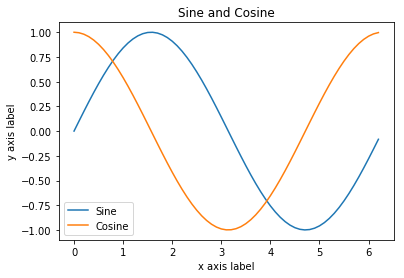

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 2 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

In case we want to show two separate plots:

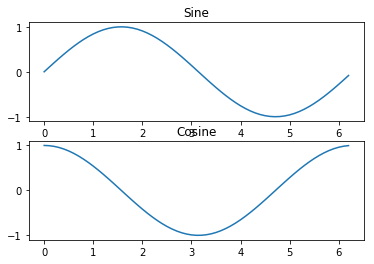

In [ ]:
# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot.
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()